In [1]:
%tensorflow_version 2.x

In [2]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
classname = ["airplain", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

這個是第 6 類 為 frog


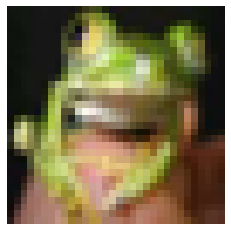

In [5]:
import random
import matplotlib.pyplot  as plt
%matplotlib inline
p = random.randint(0, 49999)
n = int(y_train[p])
plt.axis("off")
print("這個是第",n, "類", "為", classname[n])
plt.imshow(x_train[p])

In [6]:
from tensorflow.keras.applications import ResNet101V2
cnn = ResNet101V2(include_top=False, input_shape=(32, 32, 3))
cnn.summary()

171319296/171317808 [==============================] - 7s 0us/step
Model: "resnet101v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 18, 18, 64)   0           conv1_conv[0][0]                 
_____________________

In [7]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization
for i in cnn.layers:
  i.trainable = False
x = Flatten()(cnn.output)
x = Dense(1024, activation="relu")(x)
x = Dense(128, activation="relu")(x)
out = Dense(10, activation="softmax")(x)
model = Model(inputs=cnn.input, outputs=out)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 18, 18, 64)   0           conv1_conv[0][0]                 
______________________________________________________________________________________________

In [9]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint       
callback = [ EarlyStopping(patience=3, restore_best_weights=True),
            ModelCheckpoint("Cifar10_ResNet101V2.h5", save_best_only=True)]

In [10]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
model.compile(loss=SparseCategoricalCrossentropy(),
              optimizer=Adam(learning_rate=0.00001), 
              metrics=["accuracy"])
history = model.fit(x_train, y_train,
          batch_size=300, epochs=20,
          validation_split=0.1, callbacks=callback)

Epoch 1/20
150/150 [==============================] - 9s 59ms/step - loss: 33.2930 - accuracy: 0.1383 - val_loss: 13.9673 - val_accuracy: 0.1856
Epoch 2/20
150/150 [==============================] - 7s 48ms/step - loss: 11.8339 - accuracy: 0.1958 - val_loss: 10.2288 - val_accuracy: 0.2074
Epoch 3/20
150/150 [==============================] - 7s 48ms/step - loss: 9.2654 - accuracy: 0.2160 - val_loss: 8.7098 - val_accuracy: 0.2282
Epoch 4/20
150/150 [==============================] - 7s 48ms/step - loss: 8.0157 - accuracy: 0.2316 - val_loss: 7.7143 - val_accuracy: 0.2296
Epoch 5/20
150/150 [==============================] - 7s 47ms/step - loss: 7.1282 - accuracy: 0.2440 - val_loss: 7.0260 - val_accuracy: 0.2322
Epoch 6/20
150/150 [==============================] - 7s 47ms/step - loss: 6.5419 - accuracy: 0.2540 - val_loss: 6.5786 - val_accuracy: 0.2456
Epoch 7/20
150/150 [==============================] - 7s 48ms/step - loss: 6.1037 - accuracy: 0.2611 - val_loss: 6.2158 - val_accuracy: 0.

In [11]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 6s 18ms/step - loss: 4.3038 - accuracy: 0.2918


[4.303779602050781, 0.29179999232292175]

In [12]:
model.predict(x_test)
# 輸出10個機率給你, 可以了解是否有梯度爆炸問題
# 要找到出最高的 index, 用 predict_classes 直接輸出分類

array([[2.14068452e-03, 9.71837118e-02, 1.71843800e-04, ...,
        7.69683242e-01, 6.87842601e-08, 2.29332386e-06],
       [4.93375701e-04, 9.96815264e-01, 1.74122306e-07, ...,
        5.92478102e-07, 2.25772848e-03, 4.32380271e-04],
       [1.47403381e-03, 3.14635001e-02, 3.07391268e-08, ...,
        6.78638462e-05, 1.21572557e-04, 9.65432465e-01],
       ...,
       [1.65126295e-07, 3.73758303e-06, 2.92499171e-04, ...,
        5.48745098e-04, 4.51725327e-07, 7.84850386e-07],
       [4.24849713e-04, 1.09630026e-01, 2.91976263e-04, ...,
        2.52597444e-02, 4.11454821e-05, 3.34510369e-05],
       [2.86667159e-06, 4.73191292e-04, 1.67915232e-06, ...,
        2.79113110e-02, 1.47990995e-05, 1.40471896e-03]], dtype=float32)

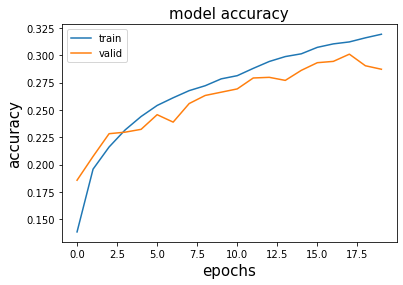

In [13]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy", fontsize=15)
plt.xlabel("epochs", fontsize=15)
plt.ylabel("accuracy", fontsize=15)
plt.legend(["train", "valid"], loc="best")

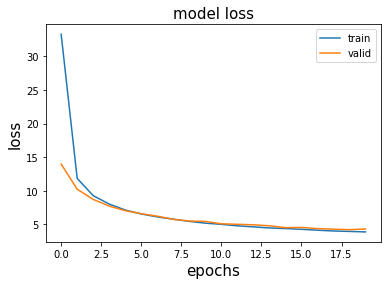

In [14]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss", fontsize=15)
plt.xlabel("epochs", fontsize=15)
plt.ylabel("loss", fontsize=15)
plt.legend(["train", "valid"], loc="best")

#### 加了 Adam(learning_rate=0.0001)之後可以讓整體機率提升
#### val_accuracy =0.30